# Naive Bayes approach

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import common

import numpy as np
import pandas as pd
import sklearn.dummy
import sklearn.naive_bayes

In [2]:
train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset('full', 'count', None)
baseline_classifier = sklearn.dummy.DummyClassifier()
baseline_classifier.fit(train_as_vec, train_targets)

/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)
/home/asgavar/.local/lib/python3.8/site-packages/sklearn/dummy.py:131: FutureWarning: The default value of strategy will change from stratified to prior in 0.24.
  warnings.warn("The default value of strategy will change from "


DummyClassifier(constant=None, random_state=None, strategy='warn')

SCORE: 0.19750153622616157
[[0.06324233 0.05853771 0.12050748 0.22551288 0.5321996 ]
 [0.06201216 0.05993332 0.12092567 0.22227888 0.53484997]
 [0.06189203 0.06109955 0.11930659 0.22207033 0.5356315 ]
 [0.0605449  0.0608882  0.11893641 0.22523329 0.5343972 ]
 [0.06120465 0.06058611 0.11701474 0.22774688 0.53344762]]


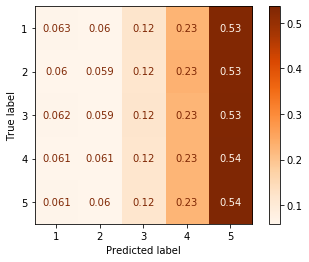

In [3]:
common.display_classifier_performance(baseline_classifier, test_as_vec, test_targets)

## Performance measure row schema

In [4]:
results_df = pd.DataFrame.from_dict([
    common.perf_row(
        baseline_classifier, test_as_vec, test_targets, 'baseline',
        'full', 'count', None, fit_prior='N/A', alpha='N/A')])
results_df

,classifier_type,sampling,representation,preprocessing,fit_prior,alpha,real_world_acc,score
0,baseline,full,count,None,N/A,N/A,0.356457,0.201218


## One multi-class combined classifier, exposed to all classes at once

In [5]:
for sampling in ['random_downsampling', 'full']:# , 'oversampled']:
    print(f'sampling = {sampling}')
    for representation in ['count', 'tf_idf']:
        print(f'    representation = {representation}')
        for preprocessing in [None, 'stem']:
            print(f'        preprocessing = {preprocessing}')
            for fit_prior in [False, True]:
                print(f'            fit_prior = {fit_prior}')
                for alpha in np.arange(0.1, 5., .1):

                    train_as_vec, train_targets, test_as_vec, test_targets = common.load_dataset(
                        sampling, representation, preprocessing)

                    classifier = sklearn.naive_bayes.MultinomialNB(fit_prior=fit_prior, alpha=alpha)
                    classifier.fit(train_as_vec, train_targets)

                    results_df = results_df.append([
                            common.perf_row(
                                classifier, test_as_vec, test_targets,
                                'multiclass', sampling, representation, 
                                preprocessing, fit_prior=fit_prior, alpha=alpha)])

sampling = random_downsampling
    representation = count
        preprocessing = None
            fit_prior = False
            fit_prior = True
        preprocessing = stem
            fit_prior = False
            fit_prior = True
    representation = tf_idf
        preprocessing = None
            fit_prior = False
            fit_prior = True
        preprocessing = stem
            fit_prior = False
            fit_prior = True
sampling = full
    representation = count
        preprocessing = None
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True
        preprocessing = stem
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True
    representation = tf_idf
        preprocessing = None
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True
        preprocessing = stem
            fit_prior = False


/home/asgavar/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


            fit_prior = True


In [7]:
results_df.sort_values('real_world_acc', ascending=False).head(25)

,classifier_type,sampling,representation,preprocessing,fit_prior,alpha,real_world_acc,score
0,multiclass,full,count,None,True,1.9,0.603153,0.407792
0,multiclass,full,count,None,True,1.8,0.603099,0.412196
0,multiclass,full,count,stem,True,1.9,0.603069,0.407587
0,multiclass,full,count,None,True,1.7,0.603061,0.417104
0,multiclass,full,count,stem,True,1.7,0.603050,0.416878
0,multiclass,full,count,None,True,2,0.602970,0.403128
0,multiclass,full,count,stem,True,1.8,0.602967,0.411840
0,multiclass,full,count,stem,True,2,0.602951,0.402890
0,multiclass,full,count,None,True,1.6,0.602767,0.421474
0,multiclass,full,count,stem,True,1.6,0.602710,0.421258


In [ ]:
results_df[results_df['representation'] != 'tf_idf'].sort_values('score', ascending=False).head(25)